<a href="https://colab.research.google.com/github/jun-wei-lin/NCHU/blob/main/AIoT-DA/HW5%3DDeep%20Lerarning%20basic/Hw5_1_iris_classification_problem_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50, Train Acc: 0.5524, Val Acc: 0.7273
Epoch 2/50, Train Acc: 0.6476, Val Acc: 0.8636
Epoch 3/50, Train Acc: 0.6571, Val Acc: 0.8636
Epoch 4/50, Train Acc: 0.7048, Val Acc: 0.9091
Epoch 5/50, Train Acc: 0.7524, Val Acc: 0.9545
Epoch 6/50, Train Acc: 0.7714, Val Acc: 0.9545
Epoch 7/50, Train Acc: 0.7048, Val Acc: 0.9545
Epoch 8/50, Train Acc: 0.7143, Val Acc: 0.9545
Epoch 9/50, Train Acc: 0.8381, Val Acc: 0.9545
Epoch 10/50, Train Acc: 0.8286, Val Acc: 0.9545
Epoch 11/50, Train Acc: 0.8190, Val Acc: 0.9545
Epoch 12/50, Train Acc: 0.8095, Val Acc: 0.9545
Epoch 13/50, Train Acc: 0.7905, Val Acc: 0.9545
Epoch 14/50, Train Acc: 0.8667, Val Acc: 0.9545
Epoch 15/50, Train Acc: 0.8286, Val Acc: 0.9545
Epoch 16/50, Train Acc: 0.8286, Val Acc: 0.9545
Epoch 17/50, Train Acc: 0.8286, Val Acc: 0.9545
Epoch 18/50, Train Acc: 0.8286, Val Acc: 0.9545
Epoch 19/50, Train Acc: 0.8762, Val Acc: 0.9545
Epoch 20/50, Train Acc: 0.8952, Val Acc: 0.9545
Epoch 21/50, Train Acc: 0.8762, Val Acc: 0.9545
E

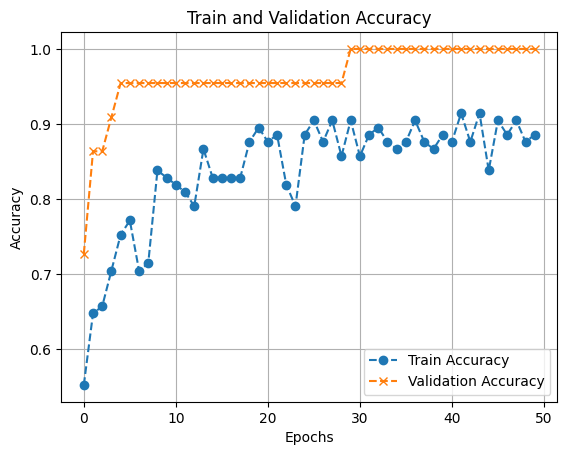

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preparation
iris = load_iris()
X, y = iris.data, iris.target

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to PyTorch tensors
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Step 2: Define the Model
class IrisModel(nn.Module):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.BatchNorm1d(16),
            nn.Dropout(0.2),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.BatchNorm1d(8),
            nn.Dropout(0.2),
            nn.Linear(8, 3)
        )

    def forward(self, x):
        return self.network(x)

# Step 3: Training and Validation Loops
def train_model(model, train_loader, val_loader, epochs=50, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    train_accs, val_accs = [], []
    for epoch in range(epochs):
        # Training
        model.train()
        train_correct, train_total = 0, 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            loss.backward()
            optimizer.step()

            # Accuracy
            preds = logits.argmax(dim=1)
            train_correct += (preds == y_batch).sum().item()
            train_total += y_batch.size(0)

        train_acc = train_correct / train_total
        train_accs.append(train_acc)

        # Validation
        model.eval()
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                logits = model(X_batch)
                preds = logits.argmax(dim=1)
                val_correct += (preds == y_batch).sum().item()
                val_total += y_batch.size(0)

        val_acc = val_correct / val_total
        val_accs.append(val_acc)

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
        scheduler.step()

    return train_accs, val_accs

# Step 4: Testing
def test_model(model, test_loader):
    model.eval()
    test_correct, test_total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            logits = model(X_batch)
            preds = logits.argmax(dim=1)
            test_correct += (preds == y_batch).sum().item()
            test_total += y_batch.size(0)

    test_acc = test_correct / test_total
    print(f"Test Accuracy: {test_acc:.4f}")
    return test_acc

# Step 5: Main Execution
if __name__ == "__main__":
    model = IrisModel()
    train_accs, val_accs = train_model(model, train_loader, val_loader, epochs=50)
    test_acc = test_model(model, test_loader)

    # Plotting
    import matplotlib.pyplot as plt
    plt.plot(train_accs, label='Train Accuracy', linestyle='--', marker='o')
    plt.plot(val_accs, label='Validation Accuracy', linestyle='--', marker='x')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Train and Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
